# Phase 1 - Exploratory analysis
### Authors: Karolina Skrypova(50%), Oleh Fedunchyk(50%)
Goal: In the first phase of the project, we will perform an exploratory analysis of the data. This will help us to understand the data and its characteristics to make better decisions in the next phases of the project and create the best model for machine learning.

## Importing libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [219]:
profiles_data = pd.read_csv('dataset-120/profiles.csv', sep='\t')
connections_data = pd.read_csv('dataset-120/connections.csv', sep='\t')
devices_data = pd.read_csv('dataset-120/devices.csv', sep='\t')
proccesses_data = pd.read_csv('dataset-120/processes.csv', sep='\t')

## 1.1 Basic description of the data together with their characteristics
### A: Analysis of data structures such as files (structures and relationships, number, types, ...), records(structures, number of records, number of attributes, types, ...)

#### Dataset 1: profiles

At the beginning we will take a look at how the data in the profiles dataset looks like. 

In [151]:
profiles_data.head()

,registration,imei,username,ssn,user_id,name,job,address,current_location,birthdate,mail,company
0,02 Apr 2024,8630330696303481594,regina30,719-26-3476,507,Rebecca Moreno,"Librarian, public",Unit 5700 Box 8952\r\nDPO AP 70659,"(Decimal('43.251681'), Decimal('4.085137'))",1977-03-13,cjohnson@hotmail.com,Shepard Ltd
1,2021-10-02,863033069630348412,ronaldhughes,500-12-7252,1158,Joshua Hicks,NaN,NaN,"(Decimal('-7.708654'), Decimal('144.652216'))",1980-10-08,ggray@gmail.com,Coleman LLC
2,"05/23/2022, 00:00:00",8630330696303482477,zwarren,073-28-3258,2379,Rebecca Hudson,NaN,"4506 John Road\r\nMillerborough, ME 08112","(Decimal('53.531034'), Decimal('100.682080'))",NaN,eric54@yahoo.com,"Hinton, Fuller and French"
3,"03/23/2023, 00:00:00",3590433799317661230,grimessamuel,006-67-1751,954,Victoria Hughes,NaN,NaN,"(Decimal('-17.4220355'), Decimal('-30.820327'))",NaN,melissajohnson@gmail.com,"Erickson, Robinson and Bailey"
4,"09/17/2020, 00:00:00",359043379931766437,obrown,188-07-0566,1409,Michael Petersen,NaN,"94495 Smith Fork Suite 229\r\nChandlerberg, MD...",NaN,NaN,ryan13@yahoo.com,Murphy PLC


This dataset contains information about users.

With a few commands we can find out more information about the dataset.

In [152]:
profiles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   registration      2535 non-null   object
 1   imei              2535 non-null   int64 
 2   username          2535 non-null   object
 3   ssn               2535 non-null   object
 4   user_id           2535 non-null   int64 
 5   name              2535 non-null   object
 6   job               761 non-null    object
 7   address           2155 non-null   object
 8   current_location  2408 non-null   object
 9   birthdate         1394 non-null   object
 10  mail              2535 non-null   object
 11  company           2535 non-null   object
dtypes: int64(2), object(10)
memory usage: 237.8+ KB


Using the info() statement, we found the data types for the individual attributes. 
We also found that the dataset has 2535 rows in it.
The number of attributes for this dataset is 12.
We can see that in this dataset 2 attributes have type int, and the rest object. 
We also found the range index, and we can see how many non-null entries there are in each attribute.

**Attributes:**
- registration - date: date of registration
- imei - number: unique number for each mobile device
- username - text: username
- ssn - specific type: social security number; citizen identification number
- user_id - number: unique number for each user
- name - text: user name
- job - text: occupation of the user
- address - text: address of the user
- current_location - text: current location of the user
- birthdate - date: date of birth of the user
- mail - text: user's email
- company - text: user's company

In [153]:
profiles_data.describe(exclude=np.number)

,registration,username,ssn,name,job,address,current_location,birthdate,mail,company
count,2535,2535,2535,2535,761,2155,2408,1394,2535,2535
unique,2233,2489,2535,2482,445,2155,2408,1377,2525,2409
top,08 Nov 2020,zwhite,663-26-6444,Michael Martinez,"Exhibitions officer, museum/gallery","971 Griffin Landing\r\nNew Patricia, CT 88011","(Decimal('59.762173'), Decimal('123.344113'))",1908-09-24,mitchelldavid@yahoo.com,Johnson Group
freq,5,3,1,4,6,1,1,2,2,5


Here we did univariate analysis for individual attributes.

In [154]:
profiles_data.dropna().shape[0]


328

328 rows have all attributes filled in.

In [155]:
profiles_data.shape[0] - profiles_data.dropna().shape[0]

2207

2207 rows have at least one attribute unfilled.

In [156]:
profiles_data.nunique()

registration        2233
imei                 494
username            2489
ssn                 2535
user_id             1578
name                2482
job                  445
address             2155
current_location    2408
birthdate           1377
mail                2525
company             2409
dtype: int64

Nunique shows us how many unique values are in each attribute. 

In [157]:
profiles_data.shape[0] - profiles_data.drop_duplicates().shape[0]

0

The number of duplicate rows is 0.

In [158]:
profiles_data.isnull().sum()

registration           0
imei                   0
username               0
ssn                    0
user_id                0
name                   0
job                 1774
address              380
current_location     127
birthdate           1141
mail                   0
company                0
dtype: int64

Above is the number of null values in the individual attributes

##### Problems with the dataset:
- Dataset contains missing values
- user_id is not unique for each user
- registration is not in the correct format(each date should be in the same format)
- some of the emails is not unique (that would be a problem because you can make different accounts with the same email)


#### Dataset 2: connections
At the beginning we will take a look at how the data in the connections dataset looks like. 

In [159]:
connections_data.head()

,ts,imei,mwra,c.katana,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.UCMobile.intl,c.updateassist,c.UCMobile.x86,c.android.vending,c.raider
0,2018-05-05 10:00:00,3590433799317661339,1.0,12.59948,8.68233,10.47388,10.83279,9.88566,42.78450,68.04373,48.16608,29.46806,62.29823
1,2018-05-05 10:01:00,8630330696303481149,0.0,10.12035,13.40907,9.91671,12.68924,9.97613,41.56210,50.81831,34.35584,27.40876,58.79877
2,2018-05-05 10:02:00,3590433799317662295,0.0,15.37526,17.28039,17.43219,11.82565,13.14464,68.96152,42.46043,52.57066,42.52979,14.00816
3,2018-05-05 10:03:00,3590433799317662113,0.0,12.23041,8.08404,11.92790,12.78835,12.77756,61.50057,62.83317,43.63141,78.21635,85.93087
4,2018-05-05 10:04:00,359043379931766486,1.0,10.15839,8.09159,11.92699,7.43053,9.74092,61.38455,64.47625,34.24340,68.61573,3.01488


With a few commands we can find out more information about the dataset.

In [160]:
connections_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15145 entries, 0 to 15144
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15145 non-null  object 
 1   imei               15145 non-null  int64  
 2   mwra               15145 non-null  float64
 3   c.katana           15145 non-null  float64
 4   c.dogalize         15145 non-null  float64
 5   c.android.gm       15145 non-null  float64
 6   c.android.chrome   15145 non-null  float64
 7   c.android.youtube  15145 non-null  float64
 8   c.UCMobile.intl    15145 non-null  float64
 9   c.updateassist     15145 non-null  float64
 10  c.UCMobile.x86     15145 non-null  float64
 11  c.android.vending  15145 non-null  float64
 12  c.raider           15145 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


Using the info() statement, we found the data types for the individual attributes. 
We also found that the dataset has 15145 rows in it.
The number of attributes for this dataset is 13.
We can see that in this dataset 11 attributes have type float, 1 attribute - type int and one attribute - type object. 
We have also found the range index, and we can see how many non-zero positions are in each attribute.
In this dataset all rows have all attributes filled.

**Attributes:**
- ts - timestamp: date and time
- imei - int: unique number for each mobile device
- mwra - float: values between 0 and 1; malware activity
- c.katana, c.dogalize, c.android.gm, c.android.chrome, c.android.youtube, c.UCMobile.intl, c.updateassist, c.UCMobile.x86, c.android.vending, c.raider - 
float: these attributes denote some activity or application that the user is using on his mobile device. Each column has a name according to the application. These values mean some metric.

**Univariate analysis:**

Continuous:

In [161]:
connections_data.describe()

,imei,mwra,c.katana,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.UCMobile.intl,c.updateassist,c.UCMobile.x86,c.android.vending,c.raider
count,1.514500e+04,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000
mean,3.888406e+18,0.625157,12.753468,10.978112,12.170533,11.617357,11.626803,60.290531,54.567888,51.059147,49.678824,49.810844
std,3.334890e+18,0.484098,1.863855,2.705844,2.392459,2.500184,2.490396,11.088297,11.328329,12.209954,28.978242,28.866897
min,3.590434e+17,0.000000,5.577070,2.953200,0.000000,2.433500,0.873520,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,11.493940,8.968680,10.776180,9.946600,10.077080,52.925080,47.021990,42.745990,24.693380,24.690250
50%,3.590434e+18,1.000000,12.747460,10.882380,12.374110,11.857690,11.934540,60.321530,54.615610,50.992960,49.257060,49.491280
75%,8.630331e+18,1.000000,14.003480,12.896070,13.793090,13.402420,13.396620,67.661290,62.179120,59.253310,74.859170,74.916930
max,8.630331e+18,1.000000,20.062980,21.529560,21.292520,20.337690,19.879360,100.000000,100.000000,100.000000,100.000000,100.000000


Categorical:

In [162]:
connections_data.describe(exclude=np.number)

,ts
count,15145
unique,14965
top,2018-05-06 20:17:00
freq,2


The following statement confirms that all rows have all attributes filled in.

In [163]:
connections_data.dropna().shape[0]


15145

This display shows the number of unique values in each attribute.

In [164]:
connections_data.nunique()

ts                   14965
imei                   500
mwra                     2
c.katana             14785
c.dogalize           14859
c.android.gm         14838
c.android.chrome     14855
c.android.youtube    14825
c.UCMobile.intl      14927
c.updateassist       14929
c.UCMobile.x86       14936
c.android.vending    14961
c.raider             14958
dtype: int64

The number of duplicate rows is 180 according to the command below.

In [165]:
connections_data.shape[0] - connections_data.drop_duplicates().shape[0]

180

##### Problems with the dataset:
- At this stage we do not see any problems with the dataset.

#### Dataset 3: devices

#### Dataset 4: proccesses

### B: Analysis of individual attributes: for the selected significant attributes (min 10), analyse their distributions and basic descriptive statistics.

#### Dataset 1: profiles
##### Significant attributes:

**Registation date**

Format registation date to same format.

In [166]:
profiles_data["fixed_registration_date"] = pd.to_datetime(profiles_data["registration"], format='mixed')

We can see how many users have registered in each year.

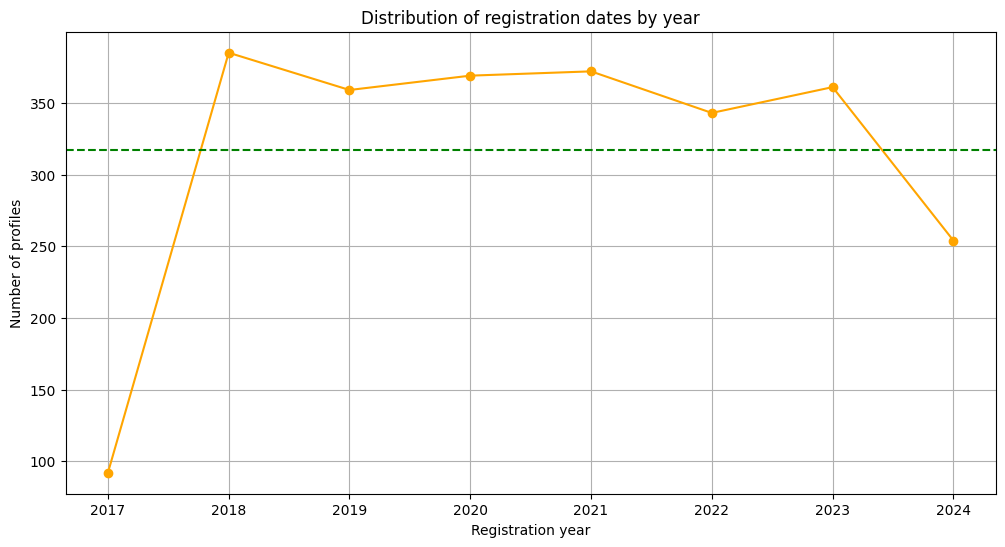

In [167]:
profiles_data['year'] = profiles_data['fixed_registration_date'].dt.year

year_mean = profiles_data['year'].value_counts().mean()

plt.figure(figsize=(12, 6))
plt.plot(profiles_data['year'].value_counts().sort_index(), marker='o', color='orange')
plt.title('Distribution of registration dates by year')
plt.xlabel('Registration year')
plt.ylabel('Number of profiles')
plt.axhline(year_mean, color='green', linestyle='--')

plt.grid()
plt.show()

As we can see, the most users registered in 2018. Users started to register in 2017 and in 2024 the registration number is falling. The green line shows the average number of registrations per year.

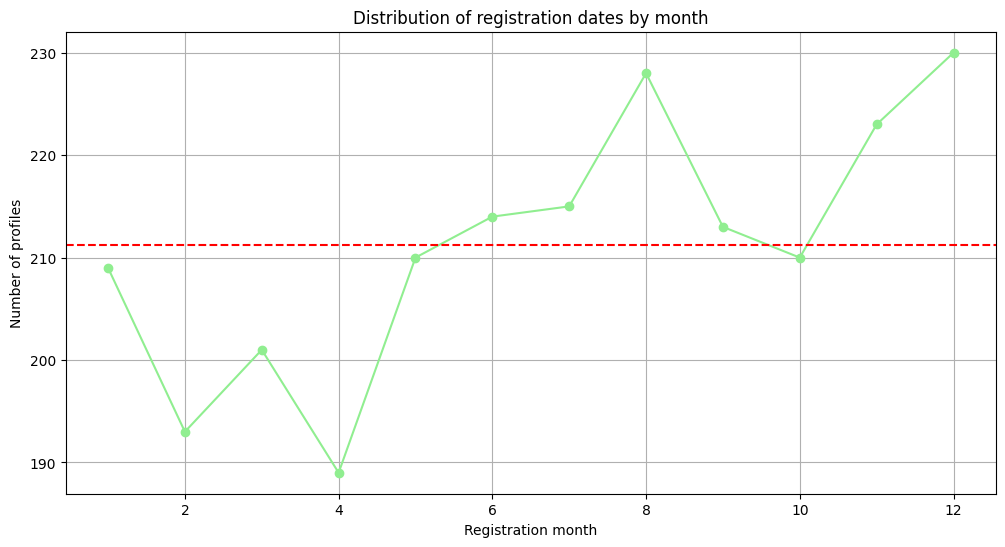

In [168]:
profiles_data['month'] = profiles_data['fixed_registration_date'].dt.month

month_mean = profiles_data['month'].value_counts().mean()

plt.figure(figsize=(12, 6))
plt.plot(profiles_data['month'].value_counts().sort_index(), marker='o', color='lightgreen')
plt.title('Distribution of registration dates by month')
plt.xlabel('Registration month')
plt.ylabel('Number of profiles')

plt.axhline(month_mean, color='red', linestyle='--')
plt.grid()
plt.show()

As we can see, the most users register in December and second part of the year. The red line shows the average number of registrations per month.

**Bitrhdate**


In the start we will delete the rows with missing values in the birthdate attribute.

In [169]:
profiles_data_unique = profiles_data['birthdate'].drop_duplicates()
profiles_data_unique.reset_index(drop=True, inplace=True)
profiles_data['birthdate-year'] = pd.to_datetime(profiles_data_unique, format="mixed", errors='coerce').dt.year
profiles_data.dropna(subset=['birthdate-year'])

,registration,imei,username,ssn,user_id,name,job,address,current_location,birthdate,mail,company,fixed_registration_date,year,month,birthdate-year
0,02 Apr 2024,8630330696303481594,regina30,719-26-3476,507,Rebecca Moreno,"Librarian, public",Unit 5700 Box 8952\r\nDPO AP 70659,"(Decimal('43.251681'), Decimal('4.085137'))",1977-03-13,cjohnson@hotmail.com,Shepard Ltd,2024-04-02,2024,4,1977.0
1,2021-10-02,863033069630348412,ronaldhughes,500-12-7252,1158,Joshua Hicks,NaN,NaN,"(Decimal('-7.708654'), Decimal('144.652216'))",1980-10-08,ggray@gmail.com,Coleman LLC,2021-10-02,2021,10,1980.0
3,"03/23/2023, 00:00:00",3590433799317661230,grimessamuel,006-67-1751,954,Victoria Hughes,NaN,NaN,"(Decimal('-17.4220355'), Decimal('-30.820327'))",NaN,melissajohnson@gmail.com,"Erickson, Robinson and Bailey",2023-03-23,2023,3,1920.0
4,"09/17/2020, 00:00:00",359043379931766437,obrown,188-07-0566,1409,Michael Petersen,NaN,"94495 Smith Fork Suite 229\r\nChandlerberg, MD...",NaN,NaN,ryan13@yahoo.com,Murphy PLC,2020-09-17,2020,9,1954.0
5,2022-07-30,8630330696303482030,matthewsexton,070-72-5615,160,Angela Reed,NaN,"93778 Williams Lodge\r\nSouth Morganshire, GU ...","(Decimal('37.4549045'), Decimal('102.548405'))",NaN,samantha77@yahoo.com,Braun LLC,2022-07-30,2022,7,1914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,2017/10/06,8630330696303481321,clarkshannon,192-65-2921,1100,Rebecca Phillips,Animator,"5124 Smith Locks Apt. 138\r\nNorth Katrina, SC...","(Decimal('51.1641505'), Decimal('142.508673'))",NaN,mcbridestephanie@gmail.com,"Wheeler, Thompson and Frost",2017-10-06,2017,10,1918.0
1374,2022/05/08,863033069630348958,harveymichael,644-33-9810,1725,Keith Nunez,NaN,NaN,"(Decimal('-81.030447'), Decimal('51.499961'))",NaN,bhines@gmail.com,"Lopez, Mcdowell and Smith",2022-05-08,2022,5,1932.0
1375,"12/23/2017, 00:00:00",863033069630348974,robleswendy,279-89-1119,405,Kristen Walker,NaN,"960 Laura Park Apt. 645\r\nNew David, PW 21824","(Decimal('-16.8804255'), Decimal('78.735270'))",1977-03-01,brittanybenton@yahoo.com,Perry-Wells,2017-12-23,2017,12,1998.0
1376,03 Aug 2024,3590433799317661271,shannon87,145-19-2179,1592,Amy Morse,NaN,NaN,"(Decimal('-68.9539975'), Decimal('-142.766036'))",NaN,jsmith@hotmail.com,Munoz-Evans,2024-08-03,2024,8,1995.0


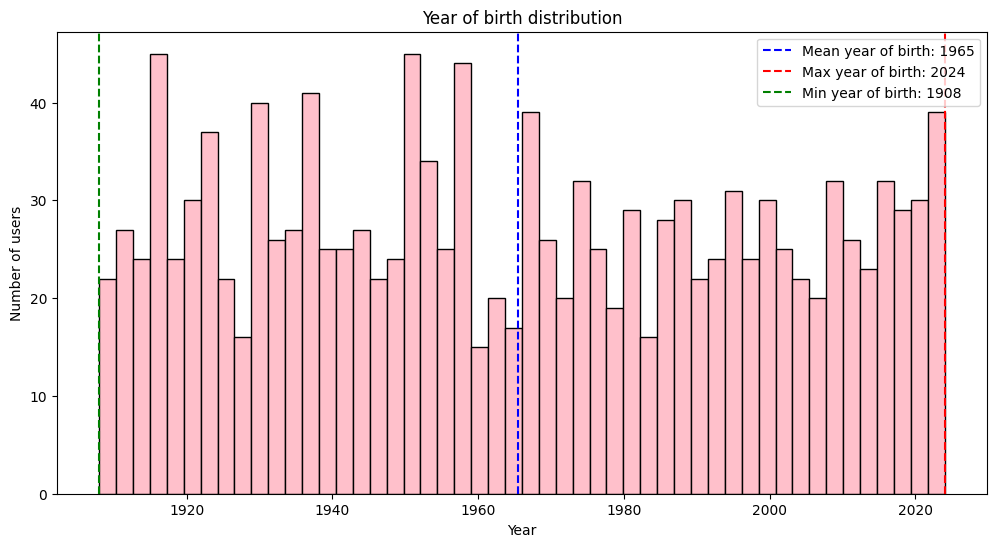

In [170]:
mean_year_birthday = profiles_data['birthdate-year'].mean()
max_year_birthday = profiles_data['birthdate-year'].max()
min_year_birthday = profiles_data['birthdate-year'].min()
plt.figure(figsize=(12, 6))
plt.hist(profiles_data['birthdate-year'], bins=50, color='pink', edgecolor='black')
plt.title('Year of birth distribution')
plt.xlabel('Year')
plt.ylabel('Number of users')
plt.axvline(mean_year_birthday, color='blue', linestyle='--', label='Mean year of birth: '+str(int(mean_year_birthday)))
plt.axvline(max_year_birthday, color='red', linestyle='--', label='Max year of birth: '+str(int(max_year_birthday)))
plt.axvline(min_year_birthday, color='green', linestyle='--', label='Min year of birth: '+str(int(min_year_birthday)))
plt.legend()
plt.show()

As we can see above, the average year of birth was 1965. But some data not give us the correct information. The oldest user was born in 1908 and the youngest in 2024. This is not possible as if person was born in 1908, now he would be 114 years old.

**Email domains**

Let's prepare the data for the analysis. We will extract the domain from the email address. Duplicate mails will be removed.

In [171]:
profiles_data['mail-formatted'] = profiles_data['mail'].drop_duplicates().str.split('@').str[1]
profiles_data['mail-formatted'].value_counts()

mail-formatted
yahoo.com      853
gmail.com      838
hotmail.com    834
Name: count, dtype: int64

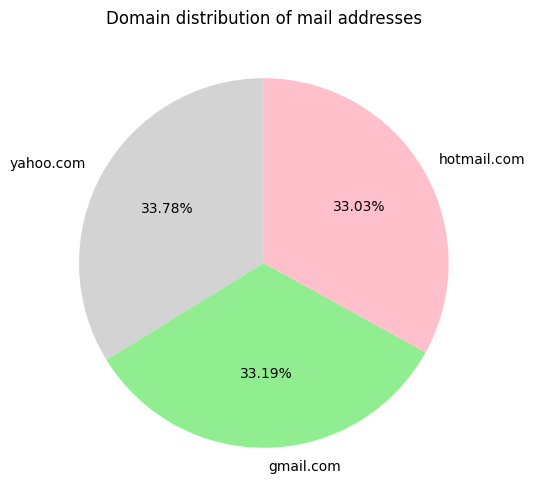

In [172]:
plt.figure(figsize=(8, 6))
plt.title(f'Domain distribution of mail addresses')
profiles_data['mail-formatted'].value_counts().plot.pie(autopct='%1.2f%%', startangle=90, colors=['lightgrey', 'lightgreen', 'pink'])
plt.ylabel('')
plt.show()

In the plot above we can see that mail domain distribution is very balanced. The most popular domain is yahoo.com. But the difference between the most popular and the least popular domain is not significant.

#### Dataset 2: connections

**mwra**

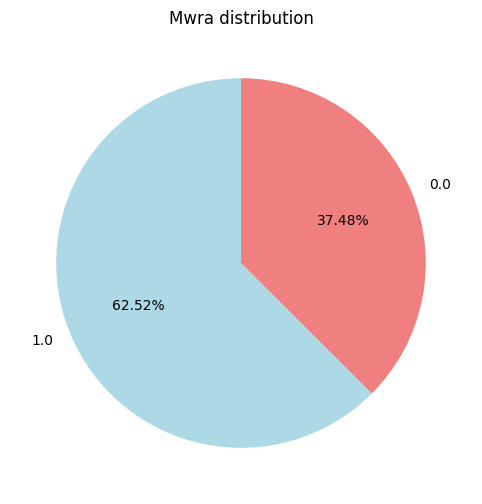

In [173]:
plt.figure(figsize=(8, 6))
plt.title(f'Mwra distribution')
connections_data['mwra'].value_counts().plot.pie(autopct='%1.2f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.ylabel('')
plt.show()

A histogram of the mwra attribute is shown above. The histogram shows that the values are between 0 and 1. The value 1 is more popular that 0.

**c.android.youtube**

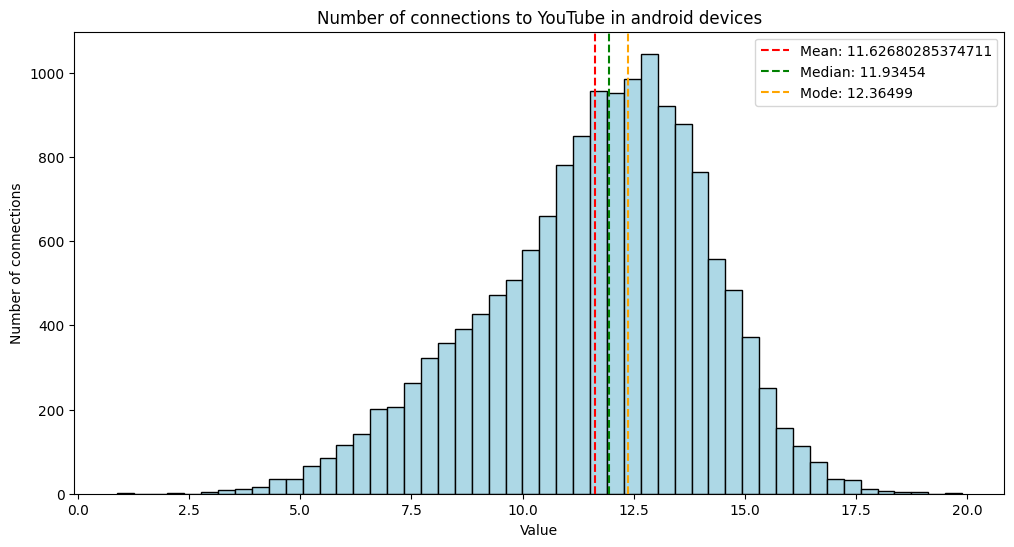

In [174]:
mean_conn_youtube = connections_data['c.android.youtube'].mean()
median_conn_youtube = connections_data['c.android.youtube'].median()
mode_conn_youtube = connections_data['c.android.youtube'].mode()[0]

plt.figure(figsize=(12, 6))
plt.hist(connections_data['c.android.youtube'], bins=50, color='lightblue', edgecolor='black')
plt.title('Number of connections to YouTube in android devices')
plt.xlabel('Value')
plt.ylabel('Number of connections')
plt.axvline(mean_conn_youtube, color='red', linestyle='--', label='Mean: '+str(mean_conn_youtube))
plt.axvline(median_conn_youtube, color='green', linestyle='--', label='Median: '+str(median_conn_youtube))
plt.axvline(mode_conn_youtube, color='orange', linestyle='--', label='Mode: '+str(mode_conn_youtube))
plt.legend()
plt.show()


As we can see above, this is negative skewed distribution. The most values are between 5 and 17.5. The average value is 11.6.

#### Dataset 3: devices


#### Dataset 4: proccesses


### C: Pairwise Data Analysis: Identify relationships and dependencies between pairs of attributes.

#### Dataset 1: profiles


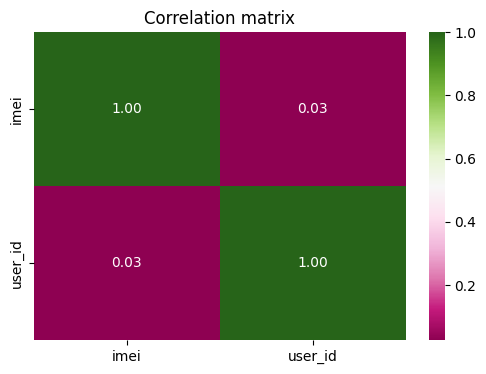

In [217]:
#### Dataset 1 profiles
numeric_cols = profiles_data.drop(columns=['year', 'month','birthdate-year']).select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, cmap='PiYG')
plt.title('Correlation matrix')
plt.show()

As we can see in the plot there are no relationships between the attributes. That because the most attributes from profiles profile are not numerical. And imei and user_id are usually unique for each user, and they are not connected with other attributes.

#### Dataset 2: connections

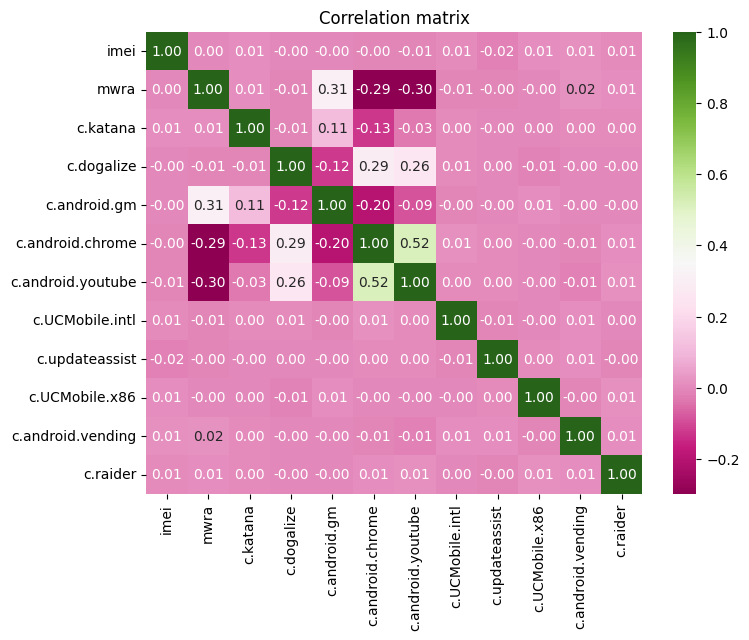

In [203]:
numeric_cols = connections_data.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, cmap='PiYG')
plt.title('Correlation matrix')
plt.show()


In the plot above we can see the correlation between the attributes. 
Below is written attributes that we're going to analyze in the next steps:
- mwra
- c.katana
- c.dogalize
- c.android.gm
- c.android.chrome
- c.android.youtube

The correlation is very low between some attributes is less than 0.01. That means that these attributes are independent. Let's write down the attributes that dont have a correlation higher than 0.01:
- imei
- c.UCMobile.intl
- c.updateassist
- c.UCMobile.x86
- c.android.vending
- c.raider

#### Dataset 3: devices


#### Dataset 4: processes


#### Combined datasets analysis

# трохи дивний граф якщо все зкомбінувати, то там певно не буде кореляції між різними табульками

# я хотіла подивитись на кореляцію між різними табличками, але певно що там її немає, то тоді нема сенсу їх з'єднувати для pairwise data analysis

Let's combine datasets and analyze the relationships between the attributes.

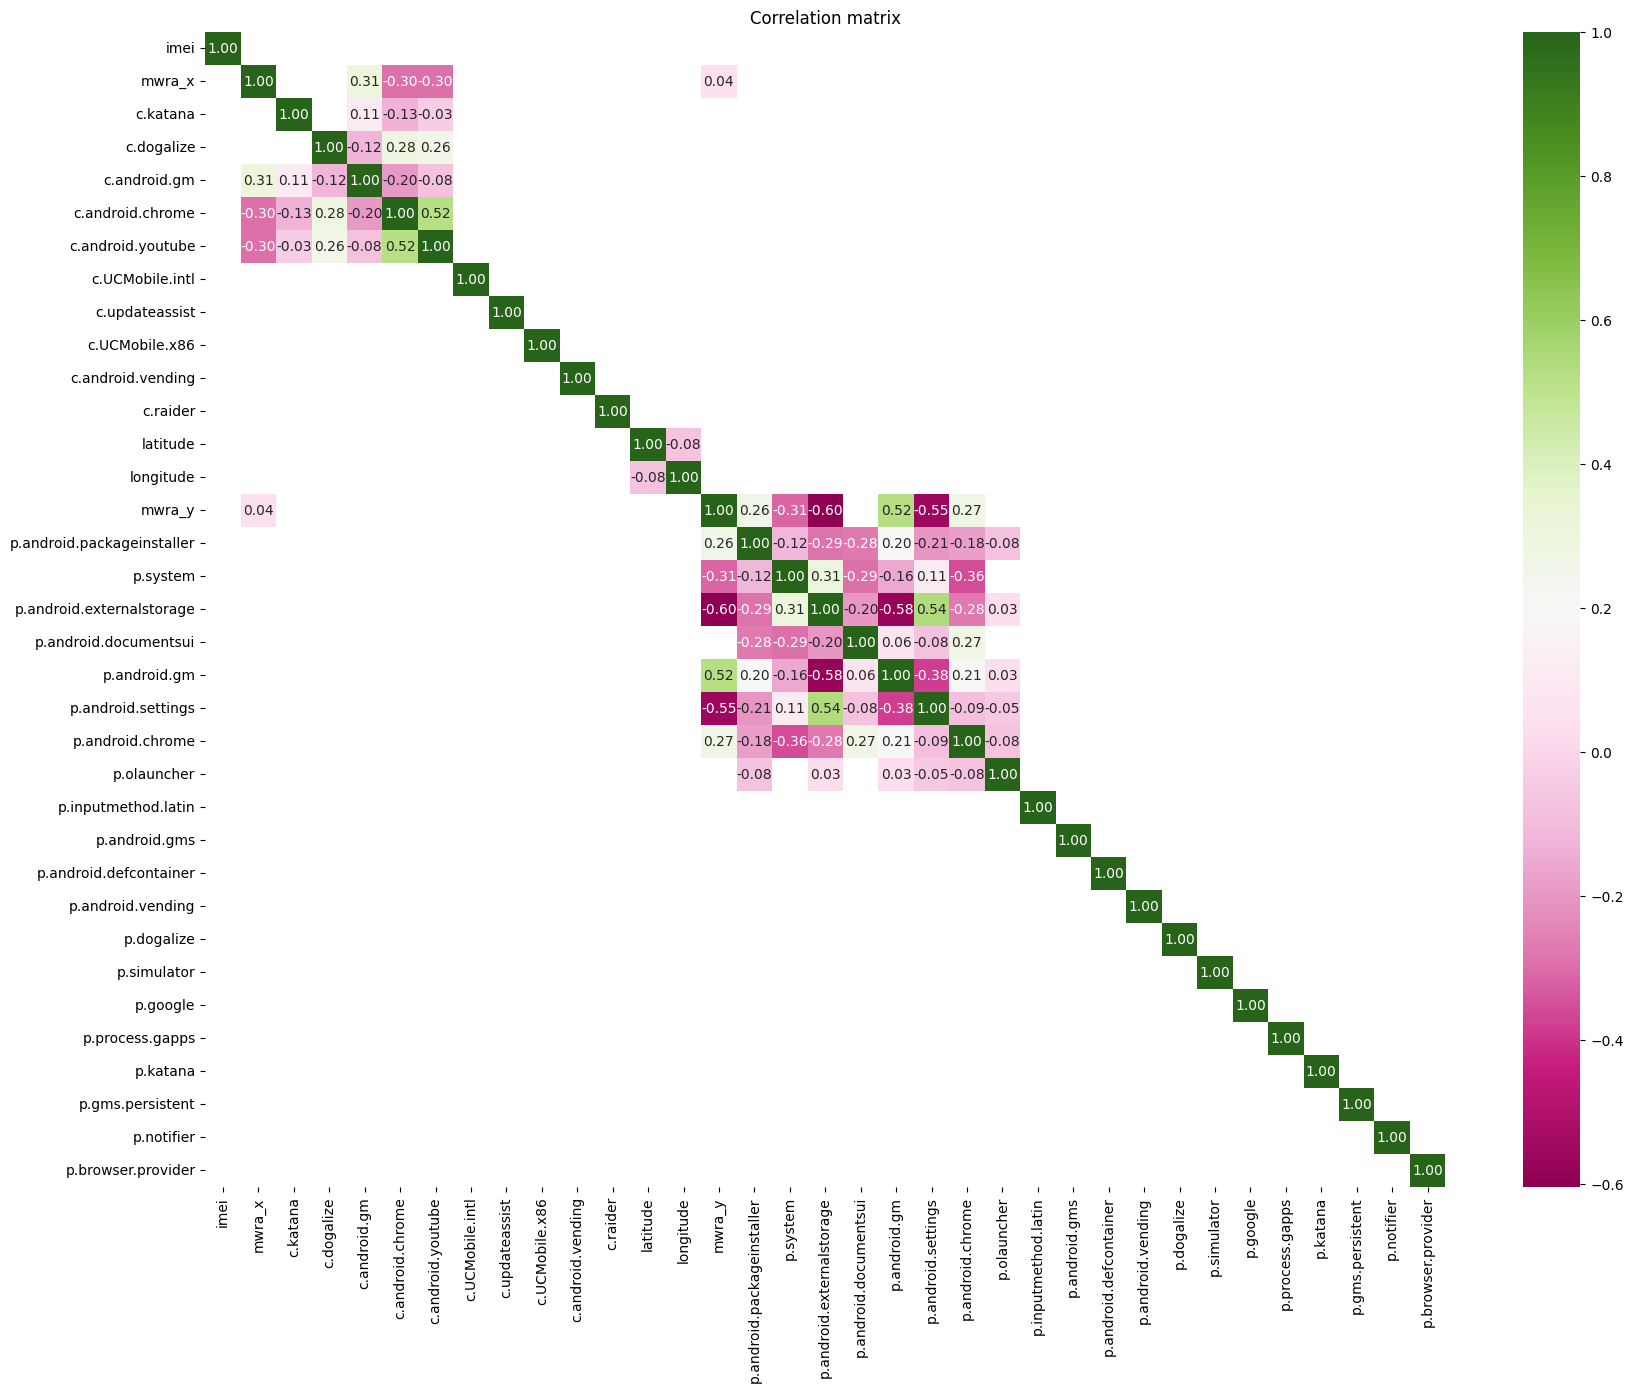

In [228]:
combined_data = pd.merge(connections_data.select_dtypes(include=np.number), devices_data.select_dtypes(include=np.number), on='imei', how='inner')
combined_data = pd.merge(combined_data, proccesses_data.select_dtypes(include=np.number), on='imei', how='inner')

corr_matrix = combined_data.corr()
mask = np.abs(corr_matrix) < 0.03 # mask to hide values with low correlation
corr_matrix_masked = corr_matrix.mask(mask)
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix_masked, fmt='.2f', annot=True, cmap='PiYG')
plt.title('Correlation matrix')
plt.show()

### D: Pairwise data analysis: identify the dependencies between the predicted variable and other variables (potential predictors)

#### Dataset 1: profiles

#### Dataset 2: connections

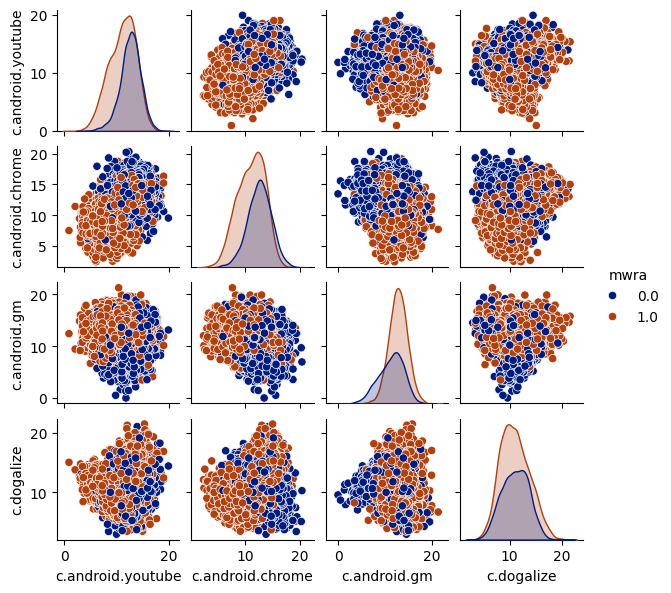

In [211]:
sns.pairplot(connections_data[['mwra','c.android.youtube', 'c.android.chrome', 'c.android.gm', 'c.dogalize']], hue='mwra', palette='dark', diag_kind='kde', height=1.5)

#### Dataset 3: devices


#### Dataset 4: processes


#### Combined datasets analysis

### E: Document your initial thinking to address the project brief, e.g. are any attributes interdependent? Which attributes does the predicted variable depend on? whether records from multiple files need to be combined?

#### Dataset 1: profiles

#### Dataset 2: connections

#### Dataset 3: devices


#### Dataset 4: processes
